# Assignment — Introduction to Network Science

In this assignment, we will consider some basics of networkx 2.5.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import requests
from zlib import adler32

In [2]:
assert nx.__version__ == '2.5'

In case of an exception, install networkx 2.5 using `pip` as follows:
```
pip uninstall networkx
pip install networkx==2.5
```

### Task 1. Reading a graph from a file (0.5 point)

In [3]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/assignment_1_task_1_part_1_edges.txt'
open('assignment_1_task_1_part_1_edges.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/assignment_1_task_1_part_2_adjlist.txt'
open('assignment_1_task_1_part_2_adjlist.txt', 'wb').write(requests.get(url).content);


Usually graph is a sparse data structure. So in most cases data is stored in sparse table formats
1. edgelist
2. adjlist

Edgelist could be depicted as table with at least two columns: source and target. Row with values `{source: i, target: j}` shows that graph has an edge between nodes `i` and `j`.

Adjlist contains index of node and list of all adjacent nodes to it.

Most of other specific formats are similar except of syntax and metadata description.

For most cases we can use given functions in networkx:

* `nx.read_adjlist`
* `nx.read_edgelist`
* `nx.read_weighted_edgelist`

In the further task, read two files: `assignment_1_task_1_part_1_edges.txt`, `assignment_1_task_1_part_2_adjlist.txt` and merge it in a single graph.

In [ ]:
def read_and_merge_graphs(path1, path2):
     graph1 = nx.read_edgelist(path1)
     graph2 = nx.read_adjlist(path2)
     graph1.add_edges_from(nx.to_edgelist(graph2))

     return graph1


In [ ]:
G = read_and_merge_graphs("assignment_1_task_1_part_1_edges.txt", 
                          "assignment_1_task_1_part_2_adjlist.txt")

assert nx.number_of_nodes(G) == 504
assert nx.number_of_edges(G) == 369

### Task 2. Nodes labeling (1 point)

Networkx read node names in text format by default, so it could be useful to preprocess nodes. For example by converting string in consecutive integer. For example it will help to work with operations over adjacency matrices and vectors of labels in DGL or PyG frameworks.

In [ ]:
list(G.nodes)[:5]

['2938', '1692', '1779', '1659', '2873']

In [ ]:
def convert_node_names_to_int(G):
   return  nx.convert_node_labels_to_integers(G)

In [ ]:
nodes = list(convert_node_names_to_int(G).nodes())

assert sorted(nodes) == list(range(len(nodes)))

### Task 3. Directed graph (0.5 point)

The direction in graphs could be crucial feature for many tasks, e.g., link analysis.

We can handle directed graphs with `nx.DiGraph` class. We can use conversion method `nx.to_directed` on the given graph or read it directly passing `nx.DiGraph` constructor to the `nx.read_*` methods.

In [ ]:
def convert_to_directed_graph(G):
    return nx.to_directed(G)

In [ ]:
def read_directed_graph(path1):
    return nx.read_edgelist(path1, create_using=nx.DiGraph())

In [ ]:
assert convert_to_directed_graph(G).is_directed()
assert read_directed_graph("assignment_1_task_1_part_1_edges.txt").is_directed()

### Task 4. Multiple directed graph (1 point)

One more interesting graph case is the Heterogeneous Graph. It could have several edges between two nodes. For example, the airline network has as many edges, as the number of itineraries between two cities. All of these edges will have their own properties like departure and arrival time, prices and etc.

For such case there is a class `nx.MultiDiGraph`

In this task we will create a `nx.MultiDiGraph` with two nodes `0` and `1` and three edges between them: one from `0` to `1` and two from `1` to `0`.

In [ ]:
def create_graph_multi_digraph():
   return nx.MultiDiGraph([(0, 1), (1, 0), (1, 0)])

In [ ]:
Gm = create_graph_multi_digraph()
assert list(Gm.edges()) == [(0, 1), (1, 0), (1, 0)]

### Task 5. Bacis statistics (0.7 point)

Networkx provides a simple interface for getting basic graph statistics:
* `nx.radius`
* `nx.diameter`
* `nx.average_shortest_path_length`
* `nx.average_clustering`

For example, here are statistics of a path graph with 3 nodes:

Radius:  1
Diameter:  2
Average shortest path length:  1.3333333333333333
Average clustering coefficient:  0.0


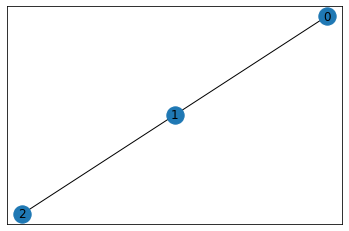

In [ ]:
G = nx.path_graph(3)
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)

Your task is to create graphs by given statistics.

Write a function `graph1` that returns a graph with a radius 3 and diameter 3.

In [ ]:
def graph1():
    G=nx.Graph()
    G.add_edges_from([(1,2), (2,3), (3,4), (1,6), (6,8), (8,10), (1,5), (5,7), (7,9), (4,10), (10,9), (9,4)])
    print('Radius: ', nx.radius(G))
    print('Diameter: ', nx.diameter(G))
    print('Average shortest path length: ', nx.average_shortest_path_length(G))
    print('Average clustering coefficient: ', nx.average_clustering(G))
    nx.draw_networkx(G)
    return G

Radius:  3
Diameter:  3
Average shortest path length:  2.1333333333333333
Average clustering coefficient:  0.1


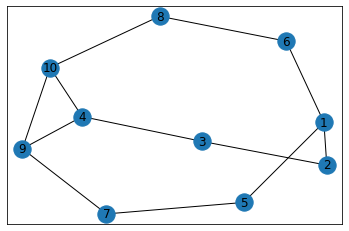

In [ ]:
G = graph1()
assert nx.radius(G) == nx.diameter(G) == 3

Write a function `graph2` that returns a graph with a diameter of at least 5 average shortest path lengths.

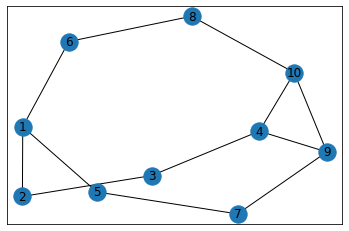

In [ ]:
nx.draw_networkx(G)

In [ ]:
def graph2():   
    n = 200
    m = 5
    G = nx.complete_graph(n+1)
    for i in range(n, n+m):
        G.add_edge(i, i+1)
    return G


Radius:  3
Diameter:  6
Average shortest path length:  1.1430262846317785
Average clustering coefficient:  0.9756798531613776


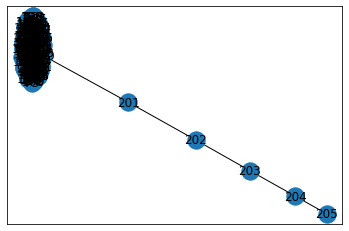

In [ ]:
G = graph2()
print('Radius: ', nx.radius(G))
print('Diameter: ', nx.diameter(G))
print('Average shortest path length: ', nx.average_shortest_path_length(G))
print('Average clustering coefficient: ', nx.average_clustering(G))
nx.draw_networkx(G)
assert nx.diameter(G) >= 5 * nx.average_shortest_path_length(G)

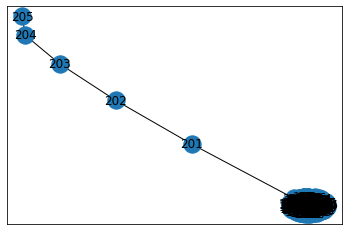

In [ ]:
nx.draw_networkx(G)

Write a function `graph3` that returns a graph with an average clustering coefficient between 0.1 and 0.11.

In [ ]:
def graph3():
    G=nx.Graph()
    G.add_edges_from([(1,2), (2,3), (3,4), (1,6), (6,8), (8,10), (1,5), (5,7), (7,9), (4,10), (10,9), (9,4)])
    return G

In [ ]:
G = graph3()
assert 0.1 <= nx.average_clustering(G) <= 0.11

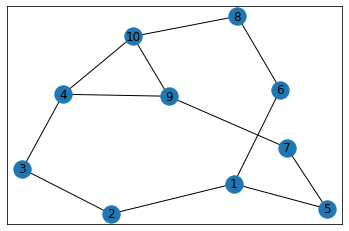

In [ ]:
nx.draw_networkx(G)

### Task 6. Graph layout (0.7 points)

A graph layout is a dictionary with a location of every node: keys are nodes and values are x, y positions. By default in `nx.draw_networkx`, it is the spring layout — a force-directed representation of the network treating edges as springs holding nodes close, while treating nodes as repelling objects.

In [4]:
G = nx.barabasi_albert_graph(10, 2)
layout = nx.spring_layout(G)
layout

{0: array([ 0.16017212, -0.10062481]),
 1: array([-0.06596741,  0.03798161]),
 2: array([-0.34054883,  0.59593467]),
 3: array([-0.29399606, -0.67874958]),
 4: array([-0.81240563, -0.65151469]),
 5: array([0.51320082, 0.54073334]),
 6: array([ 0.43387802, -0.69633565]),
 7: array([-0.68685986,  0.08345992]),
 8: array([ 0.81474802, -0.13088483]),
 9: array([0.27777881, 1.        ])}

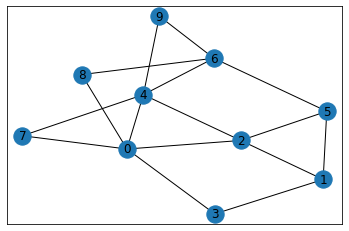

In [ ]:
nx.draw_networkx(G, pos=layout)

The Kamada Kawai layout is based on path-length cost-function. Sometimes, it is quite similar to the spring layout, however a significant difference is that the spring layout is random and the Kamada Kawai is deterministic.

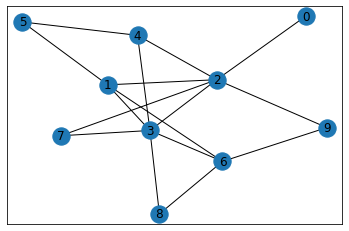

In [ ]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)

Circular layout allows to draw a graph where nodes are in a circle.

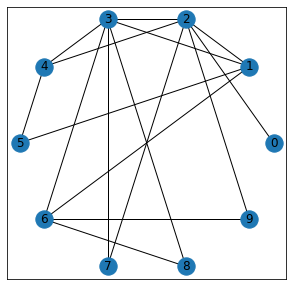

In [ ]:
layout = nx.circular_layout(G)
plt.figure(figsize=(5, 5))
nx.draw_networkx(G, pos=layout)

Bipartite layout allows to draw bipartite graph.

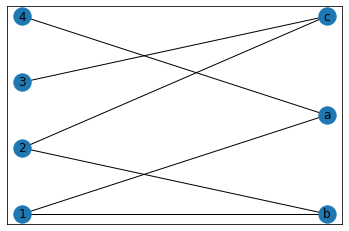

In [ ]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])
layout = nx.bipartite_layout(B, [1, 2, 3, 4])
nx.draw_networkx(B, pos=layout)

There are other layouts in networkx, also there are some useful parameters that you can find in documentation. Next, let us visualize a coappearance network of characters in The Matrix — a 1999 American science fiction action film written and directed by the Wachowskis. The dataset is taken from https://moviegalaxies.com/.

In [5]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/the_matrix_graph.gexf'
open('the_matrix_graph.gexf', 'wb').write(requests.get(url).content);


{'AGENT BROWN': array([1.        , 0.72182487]),
 'AGENT JONES': array([ 0.43773376, -0.14414261]),
 'AGENT SMITH': array([0.3159179 , 0.53759273]),
 'ANTHONY': array([ 0.26869011, -0.58832241]),
 'APOC': array([-0.23714204, -0.21066177]),
 'CABLE': array([-0.02486165,  0.11581847]),
 'COP': array([-0.09091204,  0.47104238]),
 'COPS': array([-0.23667809,  0.42931649]),
 'CYPHER': array([0.06077407, 0.3589168 ]),
 'DOZER': array([0.07290801, 0.01605063]),
 'DUJOUR': array([-0.16703379, -0.65025647]),
 'GIZMO': array([-0.40185577, -0.17189284]),
 'LIEUTENANT': array([0.36403407, 0.88208525]),
 'MAN': array([-0.16344735,  0.10987272]),
 'MOJO': array([-0.66927251,  0.3496258 ]),
 'MORPHEUS': array([-0.36574202,  0.14264798]),
 'MOUSE': array([-0.0508597 , -0.01854517]),
 'NEO': array([-8.35658924e-05, -3.00546822e-01]),
 'OLD MAN': array([ 0.31993997, -0.17107777]),
 'ORACLE': array([-0.01829011, -0.67201484]),
 'PILOT': array([ 0.28887486, -0.28104952]),
 'PRIESTESS': array([-0.65067463,

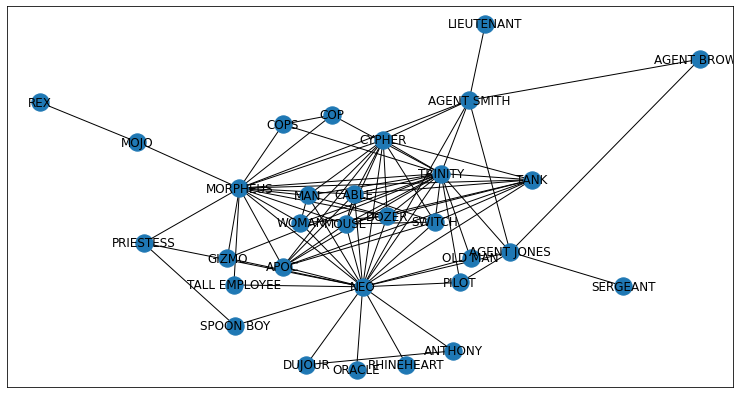

In [7]:
def get_matrix_graph():
    G = nx.read_gexf('the_matrix_graph.gexf')
    mapping = {}
    for node in G.nodes:
        mapping[node] = G.nodes[node]['label']
    G = nx.relabel_nodes(G, mapping)
    return G
matrixG = get_matrix_graph()
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx(matrixG, pos=layout)
layout

Your task is to draw the matrix graph using the kamada kawai layout with nonlinear modification to obtain a denser layout away from the NEO node. Let us define a proximity coefficient using Gaussian kernel

$$\text{coef}(i) = \exp\left(-\frac{\text{distance}^2}{2\sigma^2}\right)$$

where a _distance_ is the Euclidean distance from the node $i$ to the NEO node, $\sigma$ is the constant. Then the nodes should be moved towards the NEO node such that

$$\text{distance} = \text{coef}(i) \times \text{distance}$$

The simplest way to do it is to center the layout so that the NEO node is in x=0 y=0 and then to multiply all node positions by the proximity coefficient.

Write a function `dense_neo_layout` that takes a layout, sigma and returns a new (dense) layout.

_Hint: use `np.linalg.norm` to calculate Euclidean norm._

In [8]:
def dense_neo_layout(layout, sigma):  
  for i in layout:
      if i == 'NEO':
        continue 
      layout[i]=layout[i]-layout['NEO']
  layout['NEO']=[0,0]
  for i in layout:
      if i == 'NEO':
        continue
      distance =  np.power(np.linalg.norm(layout[i]-layout['NEO']),2)
      cof= np.exp(-distance/(2*np.power(sigma,2)))
      d = cof*distance
      layout[i]=  np.multiply(layout[i],cof)
    #  print(layout[i])

  return layout  



In [ ]:

for i in layout:
      layout[i]=layout[i]-layout['NEO']
      if i == 'NEO':
        continue
      distance =  np.power(np.linalg.norm(layout[i]-layout['NEO']),2)
      print(distance)
      cof= np.exp(-distance/(2*np.power(1.5,2)))
      distance = cof*distance
      layout[i]= np.multiply( layout[i],distance)
      print(layout[i])

print(layout)
    

6.631349531792686
[2.73563465 2.79660172]
0.03065451839781719
[0.00501998 0.00179332]
1.0176682951593812
[0.28887209 0.76618356]
0.0007958570387106524
[ 1.53221929e-05 -1.64054494e-05]
0.0026226802334175206
[-1.25515055e-04  4.75913259e-05]
0.03931268900753897
[-0.00045902  0.00771325]
0.5663142189954893
[-0.04393178  0.3732011 ]
0.5211686562930616
[-0.10333216  0.31876626]
0.2823969859076252
[0.01295146 0.14034422]
0.013978988305464658
[0.00037016 0.00160553]
0.00013624234760153278
[-6.85096241e-07 -1.43506703e-06]
0.019106645200258208
[-0.00250459  0.00080201]
4.060677648188096
[0.97662527 3.17201983]
0.046900226813533494
[-0.0037173   0.00933899]
1.0486646751975266
[-0.61010315  0.59276588]
0.1260233436360394
[-0.02768526  0.0335558 ]
0.008639586499200127
[-0.00014203  0.00078882]
0.002190008459759618
[ 9.03336854e-05 -4.83030791e-05]
0.08031055007948022
[-0.00060825 -0.02234845]
0.004076865117924127
[ 0.00018641 -0.00018136]
0.07159473628110513
[-0.01861863 -0.00297217]
1.180691186

In [10]:
layout = nx.kamada_kawai_layout(matrixG)

layout = dense_neo_layout(layout, sigma=1.5)
print (layout)
assert type(layout) == dict
assert np.all(layout['NEO'] == [0, 0])
assert np.all(layout['REX'].round(2) == [-0.67,  0.58])
assert adler32(str(layout['AGENT BROWN'].round(2)[0]).encode()) == 32309448

{'AGENT BROWN': array([0.6347956 , 0.64894282]), 'AGENT JONES': array([0.41728492, 0.14906929]), 'AGENT SMITH': array([0.26439659, 0.7012665 ]), 'ANTHONY': array([ 0.25967042, -0.27802874]), 'APOC': array([-0.2336965,  0.0886103]), 'CABLE': array([-0.02383842,  0.40057543]), 'COP': array([-0.0794271 ,  0.67473432]), 'COPS': array([-0.20758287,  0.64036612]), 'CYPHER': array([0.055206  , 0.59822147]), 'DOZER': array([0.07129925, 0.30925709]), 'DUJOUR': array([-0.16147087, -0.33823208]), 'GIZMO': array([-0.38619243,  0.12366508]), 'LIEUTENANT': array([0.25909901, 0.84153792]), 'MAN': array([-0.15643129,  0.393003  ]), 'MOJO': array([-0.55148437,  0.53581286]), 'MORPHEUS': array([-0.33979347,  0.41184526]), 'MOUSE': array([-0.04985812,  0.27690315]), 'NEO': [0, 0], 'OLD MAN': array([0.31165933, 0.12608522]), 'ORACLE': array([-0.01765543, -0.36022362]), 'PILOT': array([0.28362231, 0.01913725]), 'PRIESTESS': array([-0.58711787,  0.1774887 ]), 'REX': array([-0.67052119,  0.58006144]), 'RHINE

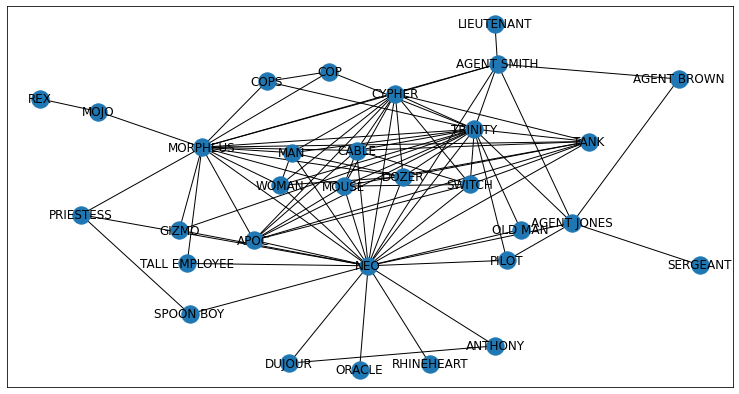

In [11]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(matrixG, layout)

### Task 7. Nodes visualization (1 point)

We can set a node size using `draw_networkx` with a parameter `node_size`. It should be a list of values ordered by `G.nodes`. For example, consider a simple path graph.

In [12]:
G = nx.path_graph(3)
G.nodes

NodeView((0, 1, 2))

Let us set a size 200 for the node 0, 300 for 1, 400 for 2.

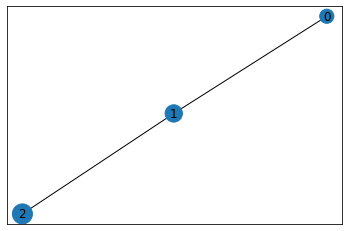

In [13]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, node_size=[200, 300, 400])

To color nodes, we can use `node_color`. It should be a list of colors:
* a tuple of float RGB 0-1 values: (red, green, blue)
* a tuple of float RGBA 0-1 values: (red, green, blue, alpha)
* a string — color name

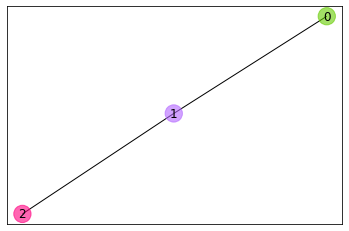

In [14]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[(0.4, 0.8, 0, 0.6), (0.7, 0.4, 1, 0.6), (1, 0, 0.5, 0.6)])

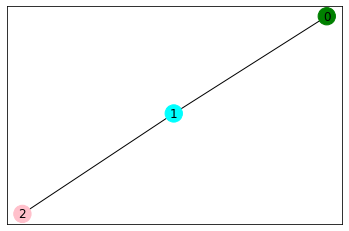

In [15]:
nx.draw_networkx(
    G,
    pos=layout,
    node_color=['green', 'cyan', 'pink'])

Also we can use a colors from matplotlib colormaps. Discrete:

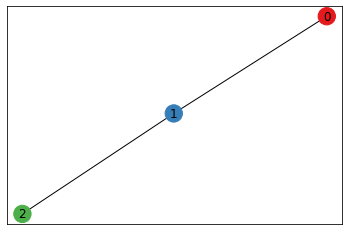

In [16]:
colors = plt.cm.Set1.colors
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[colors[0], colors[1], colors[2]])

Or continuous:

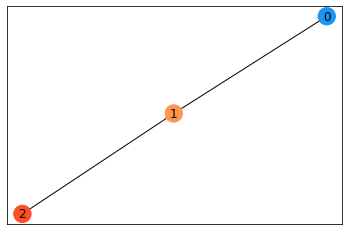

In [17]:
rainbow = plt.cm.rainbow
nx.draw_networkx(
    G,
    pos=layout,
    node_color=[rainbow(0.2), rainbow(0.8), rainbow(0.9)])

Another option of coloring nodes is to pass a list of single values by the `node_color` and colormap by the `cmap` parameter. In this case, the lowest value will assigned to the first color in colormap and vise versa.

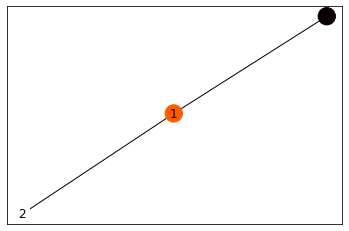

In [18]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3])

We can forcibly set a color range using `vmin` and `vmax`.

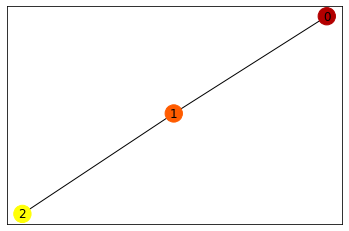

In [19]:
nx.draw_networkx(
    G,
    pos=layout,
    cmap = plt.cm.hot,
    node_color=[1, 2, 3],
    vmin=0, vmax=4)

We can border nodes using `edgecolors` and `linewidths` parameters.

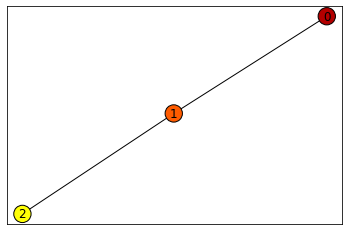

In [20]:
nx.draw_networkx(
    G=G, 
    pos=layout,
    cmap = plt.cm.hot, 
    node_color=[1, 2, 3],
    vmin=0, vmax=4, 
    edgecolors='black', 
    linewidths=1)

Your task is to adjust a size and color of nodes in the matrix graph, size and color are taken from a node degree and node attribute `G.nodes[node]`.

In [23]:
matrixG.nodes['NEO']

{'Betweenness Centrality': 197.97857142857137,
 'Closeness Centrality': 1.2666666666666666,
 'Component ID': 0,
 'Degree': 23,
 'Eccentricity': 3.0,
 'Modularity Class': 2,
 'label': 'NEO',
 'movie_id': 543,
 'viz': {'color': {'a': 1.0, 'b': 190, 'g': 202, 'r': 95},
  'position': {'x': -22.198978, 'y': -24.325882, 'z': 0.0},
  'size': 20.0}}

Write a function `drawing_nodes_params` that takes a graph and returns a dictionary with parameters for `nx.draw_networkx` of the form `{'G': graph, 'node_color': color, ...}`. Parameters should contain a graph, kamada kawai layout, node colors from `viz.color` attribute. The colors should be converted from RGB range 0-255 to RGB range 0-1. The node size is a node degree `G.degree[node]` multiplied by 100.

In [69]:
def drawing_nodes_params(graph):
    color=[]
    degree=[]
    layout = nx.kamada_kawai_layout(graph)
    for node in graph:
      n=graph.nodes[node].get('viz').get('color')
      del n['a']
      color.append( [n[key] / 255.0 for key in n])
      degree.append(graph.degree[node]*100)
    color=np.array(color)
    info={'G':graph,'pos':layout, 'node_color':color, 'node_size':degree }
    return info




In [70]:
matrixG = get_matrix_graph()
params = drawing_nodes_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 200
assert params['node_size'][1] == 600
assert nx.to_numpy_array(params['G']).sum() == 326.0

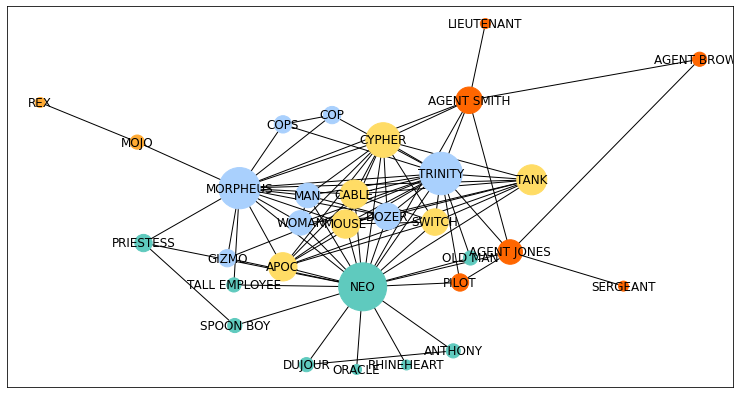

In [71]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

Sometimes, it will be useful to draw nodes in nonlinear scale. If we want to make node sizes more comparable, we can use polynomial or exponential scale. On the other hand, we can use logarithmic scale to make sizes more similar.

Write a function `drawing_nodes_polyparams` that returns the same dictionary as the `drawing_nodes_params` function, but the node size is a sum of node degree in a power 3 and 10.

$$\text{size} = \text{degree}^3 + 10$$

In [72]:
def drawing_nodes_polyparams(graph):
    color=[]
    size=[]
    layout = nx.kamada_kawai_layout(graph)
    for node in graph:
      n=graph.nodes[node].get('viz').get('color')
      del n['a']
      color.append( [n[key] / 255.0 for key in n])
      size.append(np.power(graph.degree[node],3)+10)
    color=np.array(color)
    info={'G':graph,'pos':layout, 'node_color':color, 'node_size':size }
    return info


In [73]:
matrixG = get_matrix_graph()
params = drawing_nodes_polyparams(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'node_color', 'node_size']
assert len(set(params.keys()).intersection(keys)) == 4
assert np.all(params['node_color'][10].round(2) == [0.37, 0.79, 0.75])
assert adler32(str(params['node_color'][0][1].round(2)).encode()) == 19071123
assert params['node_size'][0] == 18
assert params['node_size'][1] == 226
assert nx.to_numpy_array(params['G']).sum() == 326.0

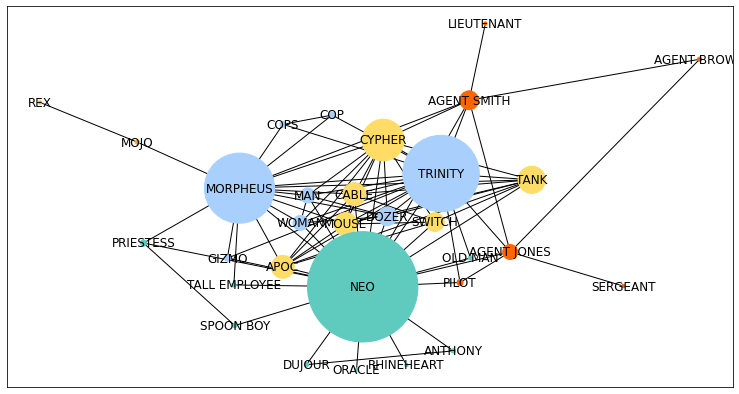

In [74]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params )

### Task 8. Edges visualization, weighted graphs (2 points)

We can set an edge width using `draw_networkx` with a parameter `width`. It should be a list of values sorted by G.edges. For example, consider a simple path graph.

In [75]:
G = nx.path_graph(4)
G.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

Let us set a width 1 for the edge 0-1, 5 for 1-2, 10 for 2-3.

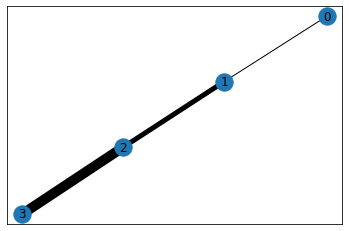

In [76]:
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout, width=[1, 5, 10])

If we create a graph by a weighted ajacency matrix, weights will be stored in an edge attribute `weight`.

In [77]:
W = np.array([[0, 1, 0, 0], 
              [1, 0, 5, 0], 
              [0, 5, 0, 10], 
              [0, 0, 10, 0]])
G = nx.from_numpy_array(W)

In this case, we can get a value using `G.edges[edge]` view

In [78]:
G.edges[(0, 1)]

{'weight': 1}

Or we can get all values using `nx.get_edge_attributes`

In [79]:
nx.get_edge_attributes(G, 'weight')

{(0, 1): 1, (1, 2): 5, (2, 3): 10}

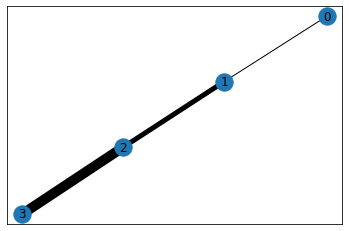

In [80]:
weights = list(nx.get_edge_attributes(G, 'weight').values())
nx.draw_networkx(G, pos=layout, width=weights)

If we want to apply specific color or style to some edges, it is possible by `edge_color` and `style` parameters. For example, we can draw an edge with a weight 10 as a red dotted line.

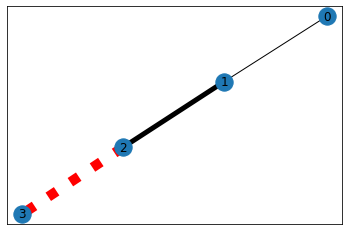

In [81]:
nx.draw_networkx(
    G, pos=layout, 
    width=[1, 5, 10], 
    edge_color=['black', 'black', 'red'], 
    style=['solid', 'solid', 'dotted'])

Your task is to draw the matrix graph where an edge width is 0 if a weight is 1, otherwise it is a weight value itself. An edge color is `red` if weight is at least 5 and `black` otherwise.

In [87]:
def drawing_edges_params(graph):
    edge_color=[]
    width=[]
    layout = nx.kamada_kawai_layout(graph)

    weights = list(nx.get_edge_attributes(matrixG, 'weight').values())
    for w in weights:
      if w == 1 :
        width.append(0)
      else:
        width.append(w)
      if w >= 5:
        edge_color.append('red')
      else:
        edge_color.append('black')

   
    info={'G':graph,'pos':layout, 'edge_color':edge_color, 'width':width}
    return info
    

In [83]:
matrixG = get_matrix_graph()
weights = list(nx.get_edge_attributes(matrixG, 'weight').values())

print(weights)

[2.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 5.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 3.0, 2.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 10.0, 1.0, 5.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 5.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 7.0, 2.0]


In [88]:
matrixG = get_matrix_graph()
params = drawing_edges_params(matrixG)
assert type(params) == dict
keys = ['G', 'pos', 'edge_color', 'width']
assert len(set(params.keys()).intersection(keys)) == 4
assert nx.to_numpy_array(params['G']).sum() == 326.0
params['width'][0] == 2.0
assert np.array(params['width']) @ params['width'] == 508
assert adler32(str(params['edge_color']).encode()) == 646700613

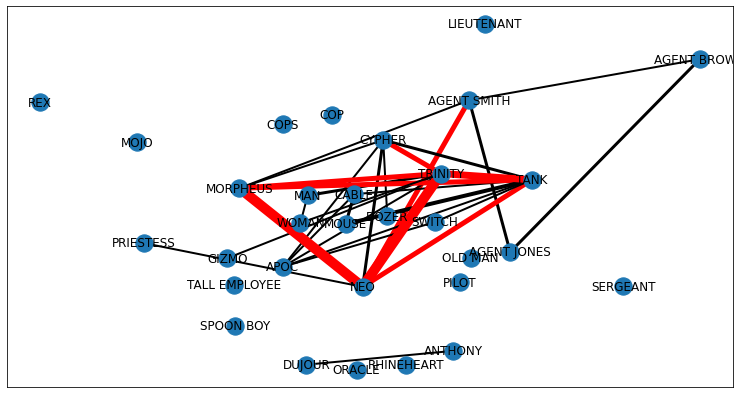

In [89]:
plt.figure(figsize=(13, 7))
nx.draw_networkx(**params)

### Task 9. Labels visualization (0.6 point)

In this task, we will modify some label parameters: font size, position, visibility. In networkx, we cannot pass a list of font sizes to `draw_networkx`, so we will use drawing by layers using other methods:
* `draw_networkx_nodes` — draw the nodes only
* `draw_networkx_edges` — draw the edges only
* `draw_networkx_labels` — draw the node labels only
* `nx.draw_networkx_edge_labels` — draw the edge labels only

Also we can separately adjust an `alpha` value for nodes, edges, labels. Here is a simple example, let us draw a path graph with 4 nodes where the node 0 is labeled as "a", 3 is "b", the edge 1-2 is labeled as "edge", and edges are transparent with `alpha=0.2`.

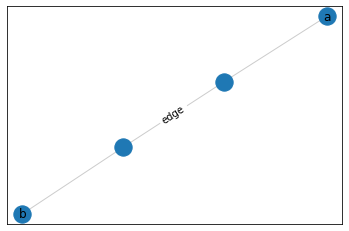

In [90]:
G = nx.path_graph(4)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)
nx.draw_networkx_labels(G, pos=layout, labels={0: 'a', 3: 'b'})
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels={(1, 2): 'edge'})
plt.show()

If we want to adjust a font size, it is possible by repeated drawing labels with different `font_size` values. For example:

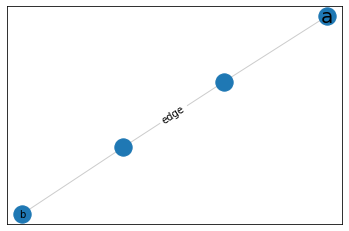

In [91]:
G = nx.path_graph(4)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_edges(G, pos=layout, alpha=0.2)
nx.draw_networkx_labels(G, pos=layout, labels={3: 'b'}, font_size=10)
nx.draw_networkx_labels(G, pos=layout, labels={0: 'a'}, font_size=20)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels={(1, 2): 'edge'})
plt.show()

Your task is to draw the matrix graph with settings: 
* labels are invisible if a node degree less than 6
* a font size is a node degree
* all labels are slided down so that $y = y - 0.025 \sqrt{\text{degree}}$

Write a function `labels_list_parameters` that takes a graph, layout and returns a list of parameters for repited drawing labels using `nx.draw_networkx_labels`. Each element of the list is a dictionary that can be passed to `nx.draw_networkx_labels`. The first dictionary is for the node degree 6, the second is for 7 and so on.

In [270]:
def labels_list_parameters(graph, layout):
  raise NotImplementedError()




    


    

In [272]:
matrixG = get_matrix_graph()
layout = nx.kamada_kawai_layout(matrixG)
list_params = labels_list_parameters(matrixG, layout)
assert type(list_params) == list
assert type(list_params[0]) == dict
print(len(list_params))
assert len(list_params) == 8
assert nx.to_numpy_array(list_params[0]['G']).sum() == 326
assert list_params[0]['font_size'] == 6
assert adler32(str(np.array(list_params[7]['font_size'])).encode()) == 10027110
assert np.all(list_params[0]['pos']['MAN'].round(2) == [-0.16, 0.05])
assert adler32(
    str(list_params[0]['pos']['AGENT JONES'].round(2)[1]).encode()) == 46465263
assert adler32(
    str(list_params[7]['pos']['NEO'].round(2)[1]).encode()) == 46792946
assert list_params[1]['labels']['AGENT SMITH'] == 'AGENT SMITH'
assert list_params[1]['labels'].get('AGENT JONES') is None \
    or list_params[1]['labels']['AGENT JONES'] == ''
assert len([val for val in  list_params[2]['labels'].values() if val != '']) == 3

8


KeyError: ignored

In [ ]:
plt.figure(figsize=(13, 7))
layout = nx.kamada_kawai_layout(matrixG)
nx.draw_networkx_nodes(matrixG, pos=layout)
nx.draw_networkx_edges(matrixG, pos=layout, alpha=0.2)
for params in labels_list_parameters(matrixG, layout):
    nx.draw_networkx_labels(**params)
plt.show()

### Task 10. Visible area (2 points)

Drawing a large graph, it may be useful to zoom in an area near some nodes by `plt.xlim(x_min, x_max)` and `plt.ylim(y_min, y_max)` where `x_min` is a right border, `y_max` is a top border. 

In [ ]:
G = nx.path_graph(4)
layout = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=layout)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.show()

Let us adjust a visible area and combine previous drawing techniques to get a more meaningful figure:
* take a node color from the `viz.color` node attribute converting 0-255 range to 0-1 range
* set a node size as $5\times\text{degree}^2$
* take an edge width from the `weight` edge attribute
* set an edge alpha is 0.2
* labels are invisible if a node degree less than 6
* set a font size as $3 \times \text{degree}^{2/3}$
* set a visible area such that a lower border is NEO, higher is AGENT SMITH, left is MORHEUS, right is TANK.

Write a function `get_all_params` that takes a graph and layout and returns a dictionary with keys:
* `nodes_params` — dict, parameters for `nx.draw_networkx_nodes`
* `edges_params` — dict, parameters for `nx.draw_networkx_edges`
* `labels_param_list` — list of dict, parameters for `nx.draw_networkx_edges`, for degrees 6, 7 and so on
* `area` — list of float vlues: a left, right, lower, higher borders of the visible area

In [ ]:
def get_all_params(graph, layout):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
matrixG = get_matrix_graph()
layout = nx.kamada_kawai_layout(matrixG)
all_params = get_all_params(matrixG, layout)
assert type(all_params) == dict
keys = ['nodes_params', 'edges_params', 'labels_param_list', 'area']
assert len(set(all_params.keys()).intersection(keys)) == 4
assert nx.to_numpy_array(all_params['nodes_params']['G']).sum() == 326
assert np.all(all_params['nodes_params']['pos']['NEO'].round(2) == [0., -0.3])
assert np.all(all_params['nodes_params']['node_color'][4].round(2) == [1., 0.86, 0.4])
assert all_params['nodes_params']['node_size'][10] == 20
assert nx.to_numpy_array(all_params['edges_params']['G']).sum() == 326
assert np.all(all_params['edges_params']['pos']['NEO'].round(2) == [0. , -0.3])
assert all_params['edges_params']['alpha'] == 0.2
assert all_params['edges_params']['width'][20] == 2
assert type(all_params['labels_param_list']) == list
assert nx.to_numpy_array(all_params['labels_param_list'][0]['G']).sum() == 326
assert np.all(all_params['labels_param_list'][5]['pos']['NEO'].round(2) == [0. , -0.3])
assert all_params['labels_param_list'][5]['labels'].get('WOMAN') is None \
    or all_params['labels_param_list'][5]['labels']['WOMAN'] == ''
assert round(all_params['labels_param_list'][2]['font_size'], 4) == 12
assert all_params['area'][0] < all_params['area'][1]
assert all_params['area'][2] < all_params['area'][3]

In [ ]:
plt.figure(figsize=(10, 7))
nx.draw_networkx_nodes(**all_params['nodes_params'])
nx.draw_networkx_edges(**all_params['edges_params'])
for params in all_params['labels_param_list']:
    nx.draw_networkx_labels(**params)
plt.xlim(all_params['area'][0] - 0.15, all_params['area'][1] + 0.1)
plt.ylim(all_params['area'][2] - 0.10, all_params['area'][3] + 0.1)
plt.show()